In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [39]:
dataset = pd.read_csv("VLagun_Lab_Basins.csv")

In [40]:
dataset.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,DOC,TPOC,Windspeedinsitu,Depth,DINtoDIP,Cyanobacteria,Chlorophyceae,Diatomophyceae,picophytoplankton,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,7.500,8.5650,3.5,3.3,17.428571,2.35,3.08,0.230,3.20,East
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,7.860,8.5200,0.0,3.6,10.227273,6.39,2.87,0.010,2.42,East
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,7.535,8.4706,4.0,3.2,4.871795,2.05,7.47,0.060,2.61,East
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,7.282,8.7020,3.5,3.0,6.351351,6.30,5.03,0.110,2.49,East
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,7.370,7.8796,4.0,3.7,4.420290,3.77,5.69,0.005,1.73,East


In [41]:
EAST = dataset[dataset.Basin == 'East']
WEST = dataset[dataset.Basin == 'West']

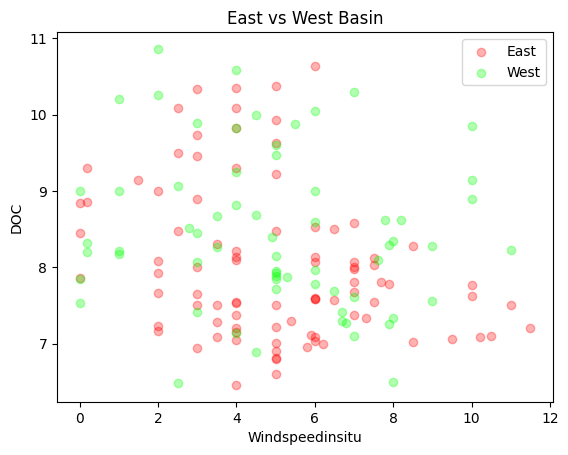

In [42]:
plt.title('East vs West Basin')
plt.xlabel('Windspeedinsitu')
plt.ylabel('DOC')
plt.scatter(EAST.Windspeedinsitu, EAST.DOC, color='red', label='East', alpha=0.3)
plt.scatter(WEST.Windspeedinsitu, WEST.DOC, color='lime', label='West', alpha=0.3)
plt.legend()
plt.show()

In [43]:
dataset.Basin = [1 if i == 'East' else 0 for i in dataset.Basin]

In [44]:
x = dataset.drop(['Basin'], axis=1)
y = dataset.Basin.values

In [45]:
x = (x - np.min(x, axis=0) / (np.max(x, axis=0) - np.min(x, axis=0)))

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [47]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [48]:
print('Naive bayes score: ', nb.score(x_test, y_test))

Naive bayes score:  0.574468085106383
